<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Unsupervised_Representation_Learning_with_Deep_Convolutional_Generative_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks**

논문 링크: https://arxiv.org/abs/1511.06434

GAN이 나온 이후, 전통적인 GAN의 여러 문제점들이 발견되었다. 먼저, 비교적으로 고해상도의 이미지를 생성하기 힘들다는 점, GAN의 구조 자체가 unstable하다는 점이었다. 이는 MiniMax 문제를 푸는 네트워크인 특성상 나올 수 밖에 없는 문제점이다. 또한 네트워크의 구조가 Fully-Connected했던 것도 원인이었다.

물론, GAN 이후의 다양한 논문들이 이를 해결할려고 하였다. 예를 들어 여러 해상도로 본 이미지의 정보들을 모아 더 나은 이미지를 생성하는 모델인 **LAPGAN** 등 여러 모델이 나왔지만 이런 문제점들을 잘 극복해내진 못했다. 그러던 와중에 2016년도에 **DCGAN**이 엄청난 성능을 보여주었다. 이후 나온 모든 GAN 논문들은 DCGAN의 아키텍처를 본따 만들었다고 해도 과인이 아닐 정도로, Computer Vision 분야에서 CNN을 활용한 **Unsupervised Learning**에 큰 영향을 끼쳤다.

1. Scene을 이해하고 기존 GAN보다 고해상도의 이미지를 생성함
2. GAN의 unstable을 없애고 **대부분의 상황에서 stable**하게 학습되도록 함
3. DCGAN 내의 특정 **Convolution filter가 특정 물체를 인식하고 반응**하고 있음을 확인함
4. Generator가 **단순 이미지를 외워서 출력하는게 아니라는 것**을 확인함
4. Generator의 input으로 들어가는 **input noise에 대한 백터 산술 연산으로 출력 결과를 조정**할 수 있다는 것을 확인함

위의 5가지 항목은 해당 논문에서 DCGAN을 만들면서 이룬 결과물들이다.


## **DCGAN**

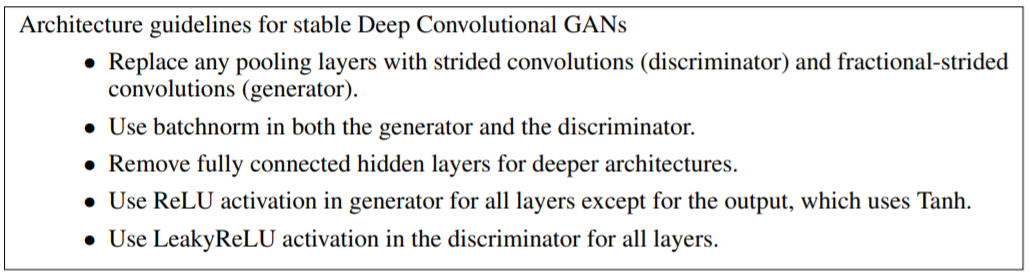

위의 이미지는 해당 논문에서 고해상도와 더 깊은 모델을 훈련시키기 위해 생각해낸 구조이다. 이를 한국어로 다시 정리해보자면,
1. pooling layers 대신에 strided convolution(downsample) 혹은 fractional-strided convolution(upsample)로 대체한다.
2. batchnorm을 generator와 discriminator 양쪽 모두 사용한다. (깊은 모델에서 발생하는 initialization 문제와 gradient 문제를 해결하기 위해 사용한다. 단, 모든 layers에 대해 batchnorm을 적용하면 sample이 변동되고, 모델이 불안정해지므로 **generator의 output layer와 discriminator의 input layer에는 batchnorm을 적용하지 않는다**.)
3. generator의 마지막 output을 제외한 모든 activation function에 ReLU를 활용한다. 하지만 output에는 Tanh를 활용한다. (모델 학습을 더 빨리 수렴시키고, 학습 분포의 색공간을 빠르게 커버하기 위해서 사용한다.)
4. discriminator은 activation function로 LeakyReLU를 활용한다.

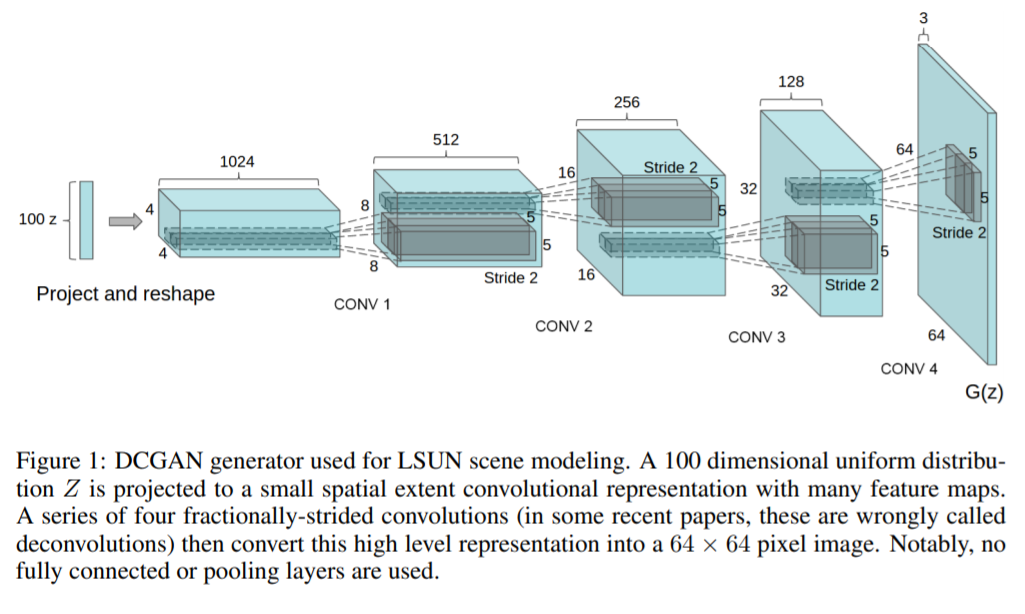

먼저, DCGAN의 경우 수식은 기존 GAN과 크게 다를 것이 없다. 하지만, 눈에 띄는 점은 DCGAN 논문의 이름처럼 **Deep Convolutional**한 아키텍처를 만든 것이다. 즉, 위의 이미지를 보면 알 수 있듯이 기존 GAN의 Fully-Connected Layer들을 Convolution Layer들로 대체를 하였다.

또한, 추가적인 사항으론 **batch_size=128로 설정하였고, weight 가중치 초기화에선 평균이 0이고 표준편차가 0.2인 정규분포를 사용했으며, optimizer에선 Adam의 lr을 0.0002로, momentum을 0.5로 내렸다.(학습의 안정화를 위해)**